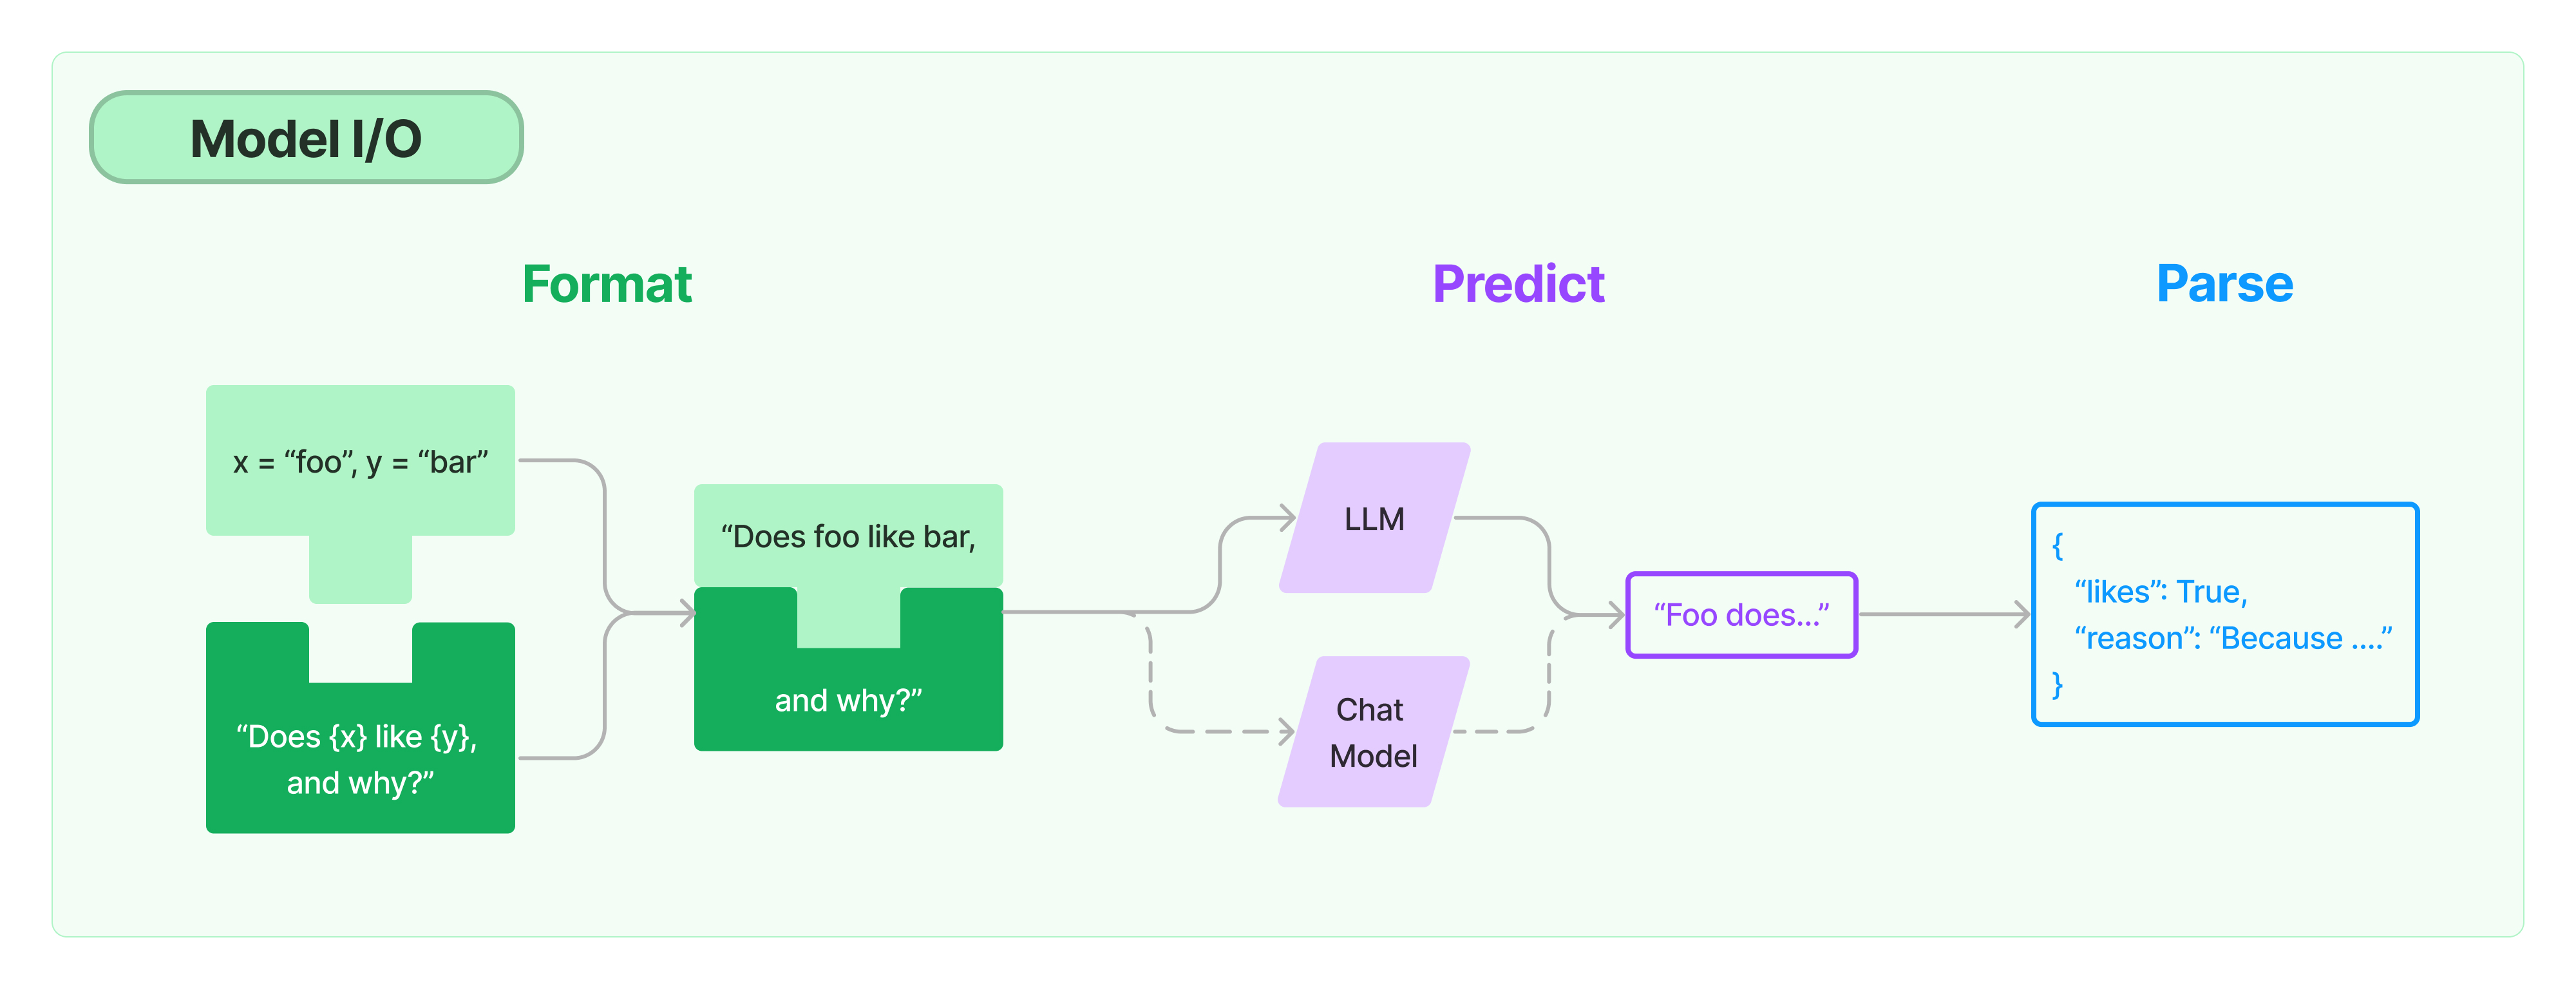

In LangChain il prompt è strutturato attraverso la formattazione delle stringhe di  python e la possibilità di quese di contenere placeholder per variabili.

In [ ]:
name = "Fabio"
print(f"Hello, {name}!")
print(f"""Ciao {name}""")

ex_test = \
"""
Buongiorno {name_1} come sta {name_2}?
"""

print(ex_test.format(name_1=name, name_2="Ciccio"))


# **PROMPT TEMPLATES**

In [10]:
from langchain.prompts import ChatPromptTemplate



chat_template = ChatPromptTemplate.from_messages([
    ("system", "Sei un assistente nel settore {system_attrib}."),
    ("human", "{user_shot_1}"),
    ("ai", "{ai_shot_1}"),
    ("human", "{user_input}"),
])


crnt_user_input = "messaggio in tempo reale"
messages = chat_template.format_messages(
    system_attrib="dei monopattini",
    user_shot_1="buongiorno saprebbe dirmi l'età per poter guidare un monopattino.",
    ai_shot_1="14 anni",
    user_input=crnt_user_input
)



In [16]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import HumanMessagePromptTemplate
from langchain.schema.messages import SystemMessage


chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=(
                "Sei un assistente esperto nel settore delle auto elettriche."
            )
        ),
        HumanMessagePromptTemplate.from_template(
                "{text}"
            )
    ]
)

for e in chat_template:
    print(e)


('input_variables', ['text'])
('input_types', {})
('output_parser', None)
('partial_variables', {})
('messages', [SystemMessage(content='Sei un assistente esperto nel settore delle auto elettriche.'), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], template='{text}'))])
('validate_template', False)


# **LANGUAGE MODELS**

In [ ]:
llm = ChatOpenAI()
response = llm(chat_template.format_messages(text="""
                                  Buongiorno, sto cercando un auto elettrica abbastanza grande per una famigliar di cinque persone.
                                  """))
print(response)